In [1]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

In [2]:
def convertData(data, column, leftShift):
    for i in range(len(data)):
        temp = data.loc[i, column]
        unsigned = int(temp,16)

        if unsigned & (1 << 15) !=0:
            unsigned = -1*((1<<15)-(unsigned &((1<<15)-1)))
        
        data.loc[i,column] = unsigned / (1<< leftShift)
    return data

# Conversio dades de temps a timestamp
def dateChange(data):
    fin = data.shape[0]
    i=0

    while i < fin:
        now = ("06/02/2022 " + data.at[i,"time"])
        date = datetime.strptime(now, "%m/%d/%Y %H:%M:%S.%f")
        timestamp = datetime.timestamp(date)
        data.at[i,"time"]= timestamp
        i=i+1


def all_non_consecutive(arr):
    ans = []
    start = arr[0]
    index = 0
    for number in arr:
        if start == number:
            start += 1
            index += 1
            continue

        ans.append({'i': index, 'n': number})
        start = number + 1
        index += 1

    return ans

In [3]:
def grafica(llista):
    temp = all_non_consecutive(llista)
    llista_resultat=[]
    aux_llista=[]
    aux_llista.append(llista[0])
    for i in temp:
        aux_llista.append(llista[i["i"]-1])
        aux_llista.append(i["n"])
    aux_llista.append(llista[-1])

    print(aux_llista)
    i=0
    while i < len(aux_llista):
        #balance_test.loc[aux_llista[i]:aux_llista[i+1]].plot(subplots=True, layout=())
        new_df = balance_test.loc[aux_llista[i]:aux_llista[i+1]]
        new_df.reset_index(inplace=True, drop=True)
        llista_resultat.append(new_df)
        i=i+2
    return llista_resultat


In [8]:
dades = pd.read_csv("C:/Users/Usuario/OneDrive/Escritorio/Universitat/TFG/Mataro_postu_IMU/ID_PP52F_DATA_16-05-2023_HORA_16-34-25.345.csv", delimiter=";")
#dades = pd.read_csv("test.csv", delimiter=";")
#print(dades["time"])

#dateChange(dades)

#print(dades["time"])
convertData(dades,"accelerometerX",10)
convertData(dades,"accelerometerY",10)
convertData(dades,"accelerometerZ",10)

#print(dades)

,time,id,test,action,accelerometerX,accelerometerY,accelerometerZ,gyroscopeX,gyroscopeY,gyroscopeZ,...,compassZ,gravityVectorX,gravityVectorY,gravityVectorZ,quaternionW,quaternionX,quaternionY,quaternionZ,steps,timeSteps
0,1684248290370,pp52f,0,0,-0.9375,-0.000977,0.24707,FF5F,FFF6,0079,...,0000,C117A74D,3EDBE22C,401EAD99,D5FCD490,145CBB51,DE9990D8,E3B3BD40,NaN,NaN
1,1684248290417,pp52f,0,0,-0.956055,-0.009766,0.246094,FFB7,003C,0081,...,0000,C11799D1,3EDD2F99,401F76A2,D6022055,146269AE,DEA6C8EA,E3A06815,NaN,NaN
2,1684248290449,pp52f,0,0,-0.946289,0.003906,0.249023,000B,0023,0077,...,0000,C1179F56,3EDD7E0D,401F1E60,D60BB98C,146C5A26,DEA89BC9,E397376F,NaN,NaN
3,1684248290464,pp52f,0,0,-0.936523,0.023438,0.244141,001E,0065,0036,...,FD72,C117A303,3EE0C96C,401ED746,D611FF5E,146D4C04,DEA5AEF7,E3921220,NaN,NaN
4,1684248290467,pp52f,0,0,-0.9375,0.029297,0.246094,001C,0098,FFBF,...,0000,C117AA5E,3EE3C658,401E52E3,D61748F3,146D0B2C,DE9F1599,E391D645,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28940,1684249013188,pp52f,0,0,-0.956055,0.050781,0.231445,FFE9,002F,0000,...,0000,C1187DD3,3F00A2BB,4010501A,CFD6B160,0926B59F,D95B3A9E,F1E0F82C,NaN,NaN
28941,1684249013200,pp52f,0,0,-0.963867,0.050781,0.235352,FFEB,001E,FFFC,...,0000,C11882BA,3F005E16,4010041A,CFD96B1B,09299283,D958BB00,F1E05F6D,NaN,NaN
28942,1684249013249,pp52f,0,0,-0.958008,0.053711,0.226562,FFF1,0010,0000,...,0000,C1188491,3F00233F,400FE1C7,CFDAF73E,092C2FE0,D957DBAB,F1DF2EF7,NaN,NaN
28943,1684249013278,pp52f,0,0,-0.951172,0.051758,0.220703,FFED,FFE7,0010,...,FD58,C1188704,3F0005D3,400FBA8D,CFDCB0F1,092E6132,D956B207,F1DDE7D7,NaN,NaN


In [24]:
balance_test

,accelerometerX,accelerometerY,accelerometerZ
40,-0.946289,0.017578,0.241211
41,-0.954102,0.022461,0.235352
42,-0.960938,0.025391,0.234375
43,-0.961914,0.027344,0.226562
44,-0.964844,0.027344,0.230469
...,...,...,...
13599,-0.901367,0.092773,0.303711
13600,-0.917969,0.089844,0.301758
13601,-0.926758,0.09082,0.313477
13602,-0.930664,0.098633,0.323242


In [30]:
balance_test.loc[757:790]

,accelerometerX,accelerometerY,accelerometerZ
757,-0.966797,0.039062,0.230469
758,-0.960938,0.041016,0.231445
759,-0.962891,0.03125,0.222656
760,-0.956055,0.025391,0.21875
761,-0.955078,0.033203,0.21875
762,-0.958984,0.02832,0.22168
763,-0.966797,0.033203,0.22168
764,-0.959961,0.040039,0.223633
765,-0.952148,0.035156,0.213867
766,-0.960938,0.025391,0.226562


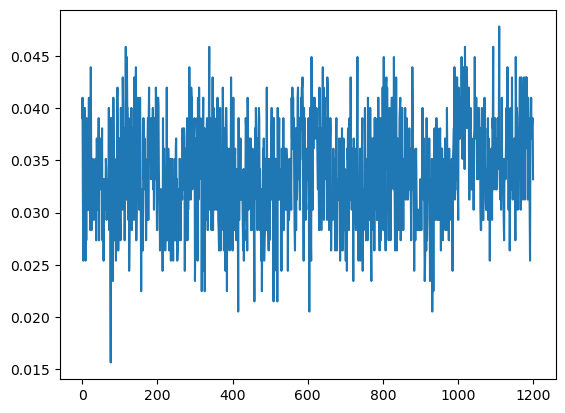

In [41]:
llista = list(range(0,1200))
plt.plot(llista,balance_test.loc[757:1956]["accelerometerY"])

In [9]:

balance_test = dades.loc[dades["test"]==5, ["action","accelerometerX","accelerometerY","accelerometerZ"]]

llista_ROA = balance_test.index[balance_test["action"] == 1].tolist()

print(llista_ROA)
llista_ROC = balance_test.index[balance_test["action"] == 2].tolist()
llista_RGA = balance_test.index[balance_test["action"] == 3].tolist()
llista_RGC = balance_test.index[balance_test["action"] == 4].tolist()
balance_test.drop("action", inplace=True, axis=1)


[757, 758, 759, 760, 761, 762, 763, 764, 765, 766, 767, 768, 769, 770, 771, 772, 773, 774, 775, 776, 777, 778, 779, 780, 781, 782, 783, 784, 785, 786, 787, 788, 789, 790, 791, 792, 793, 794, 795, 796, 797, 798, 799, 800, 801, 802, 803, 804, 805, 806, 807, 808, 809, 810, 811, 812, 813, 814, 815, 816, 817, 818, 819, 820, 821, 822, 823, 824, 825, 826, 827, 828, 829, 830, 831, 832, 833, 834, 835, 836, 837, 838, 839, 840, 841, 842, 843, 844, 845, 846, 847, 848, 849, 850, 851, 852, 853, 854, 855, 856, 857, 858, 859, 860, 861, 862, 863, 864, 865, 866, 867, 868, 869, 870, 871, 872, 873, 874, 875, 876, 877, 878, 879, 880, 881, 882, 883, 884, 885, 886, 887, 888, 889, 890, 891, 892, 893, 894, 895, 896, 897, 898, 899, 900, 901, 902, 903, 904, 905, 906, 907, 908, 909, 910, 911, 912, 913, 914, 915, 916, 917, 918, 919, 920, 921, 922, 923, 924, 925, 926, 927, 928, 929, 930, 931, 932, 933, 934, 935, 936, 937, 938, 939, 940, 941, 942, 943, 944, 945, 946, 947, 948, 949, 950, 951, 952, 953, 954, 955, 956,

In [10]:
len(llista_ROA)

2397

[757, 1965, 2069, 3256]


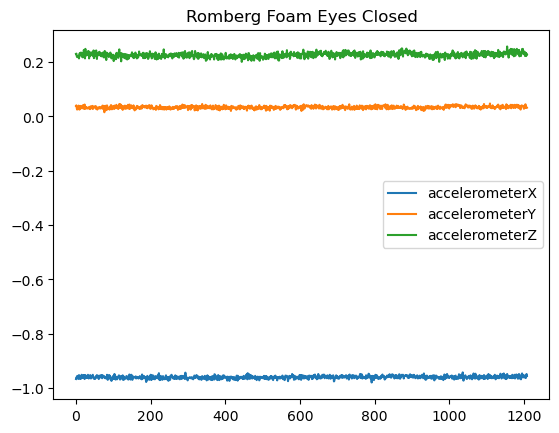

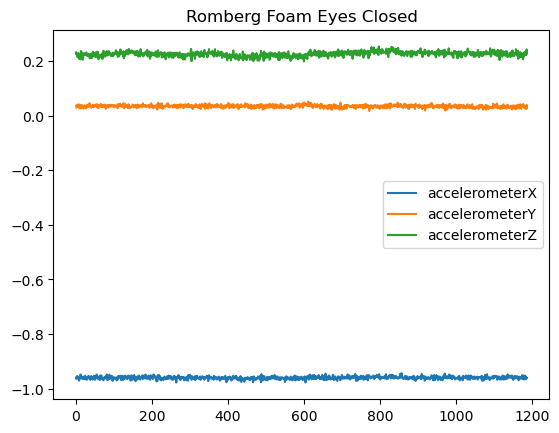

In [36]:
resultat=[]
resultat=grafica(llista_ROA)
x=0
for i in resultat:
    #i.plot(ax=axes[1,x] ,title="Espuma Ulls tancats")
    i.plot(title="Romberg Foam Eyes Closed")
    x=x+1
    plt.show()